# Calculating the plot of the liquid level

Total number of frames: 240
Frame Count:  0
Threshold Value: 0.0
Total Area: 25920
Percentage: 0.9 %
Time 0.0 

Frame Count:  1
Threshold Value: 1.0
Total Area: 25920
Percentage: 0.6 %
Time 0.1 

Frame Count:  2
Threshold Value: 1.0
Total Area: 25920
Percentage: 0.9 %
Time 0.2 

Frame Count:  3
Threshold Value: 1.0
Total Area: 25920
Percentage: 1.3 %
Time 0.3 

Frame Count:  4
Threshold Value: 1.0
Total Area: 25920
Percentage: 1.2 %
Time 0.4 

Frame Count:  5
Threshold Value: 1.0
Total Area: 25920
Percentage: 1.4 %
Time 0.5 

Frame Count:  6
Threshold Value: 1.0
Total Area: 25920
Percentage: 1.3 %
Time 0.6 

Frame Count:  7
Threshold Value: 1.0
Total Area: 25920
Percentage: 1.3 %
Time 0.7 

Frame Count:  8
Threshold Value: 1.0
Total Area: 25920
Percentage: 1.3 %
Time 0.8 

Frame Count:  9
Threshold Value: 2.0
Total Area: 25920
Percentage: 1.3 %
Time 0.9 

Frame Count:  10
Threshold Value: 2.0
Total Area: 25920
Percentage: 1.4 %
Time 1.0 

Frame Count:  11
Threshold Value: 2.0
Total Are

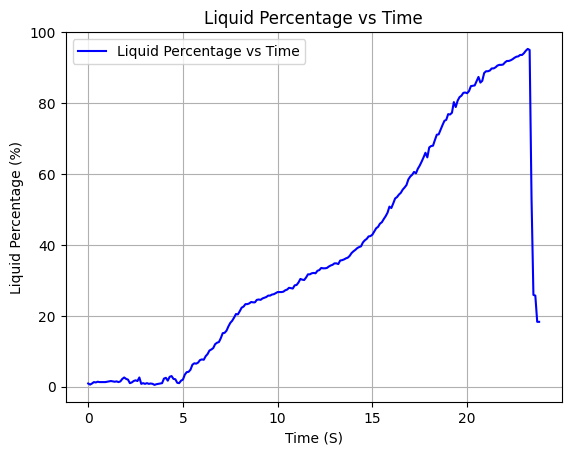

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#Set variables for x & y cordinates
x=[]
y=[]

# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame0 = cap.read()
bw_frame0 = cv2.cvtColor(frame0,cv2.COLOR_BGR2GRAY)

#Get Frames Per Second
fps = cap.get(cv2.CAP_PROP_FPS)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# Print the total number of frames
print('Total number of frames:', total_frames)

# Extract and plot frames using frame_count
for count in range(total_frames):
    flag, currentframe = cap.read()
    if not flag:
        print(f"Stopped reading at frame {count}.")
        break

    #Convert current frame to B&W
    bw_currentframe = cv2.cvtColor(currentframe,cv2.COLOR_BGR2GRAY)
    
    print ('Frame Count: ',count,)
    # Subtracting the images
    img_sub = cv2.subtract(bw_frame0, bw_currentframe)
    # Thresholding the image, to obtain binary image
    ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Print the used threshold value
    print('Threshold Value:', ret)

    # Find contours in the image   
    contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours by size in descending order
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

    # Find the area of the whole image
    rows, cols = img_sub_thresh.shape
    total_area = rows * cols
    print('Total Area:', total_area)

    # Calculate the percentage of the largest contour area, rounded to 1 decimal point
    percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
    print('Percentage:', percentage, '%')

    time = count/fps
    print('Time',time,'\n')

    x.append(time)
    y.append(percentage)


# Plot the points
plt.plot(x, y, color='blue', label='Liquid Percentage vs Time')
plt.xlabel("Time (S)")
plt.ylabel("Liquid Percentage (%)")
plt.title("Liquid Percentage vs Time")
plt.legend()
plt.grid(True)
plt.show()

# Otsu's Thresholding Method
Compared to other thresholding methods, Otsu's thresholding method derives a global threshold value from the image histogram. This would provide a better threshold value compared to Adaptive and Simple thresholding.

Additionally, the Otsu's method would automatically calculate a global value for the user. It does that by separating the image into two regions as background and foreground. It then analyzes the histogram of pixel intensity in order to find a value that best separates both groups.

# Probable Erroraneous Readings

Frame : 235
Threshold Value: 88.0
Total Area: 25920
Percentage: 53.1 %


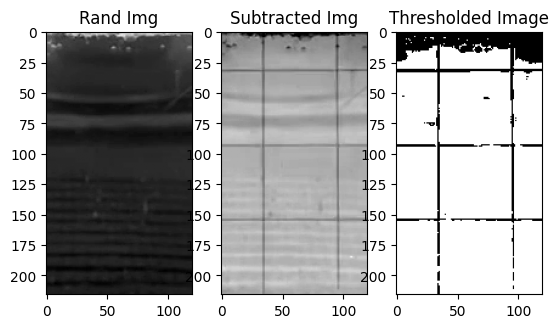

Frame : 238
Threshold Value: 97.0
Total Area: 25920
Percentage: 18.3 %


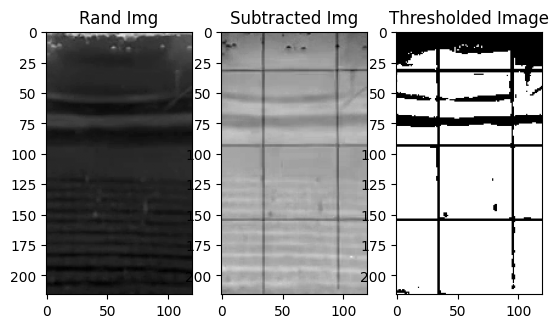

In [13]:
frame235_index = 235
frame238_index = 238

#For frame 235
cap.set(cv2.CAP_PROP_POS_FRAMES, frame235_index)
ret,frame235 = cap.read()

#For frame 238
cap.set(cv2.CAP_PROP_POS_FRAMES, frame238_index)
ret,frame238 = cap.read()

#Convert frame 235 to B&W
bw_frame235 = cv2.cvtColor(frame235, cv2.COLOR_BGR2GRAY)

#Convert frame 238 to B&W
bw_frame238 = cv2.cvtColor(frame238, cv2.COLOR_BGR2GRAY)

# Subtracting frame 235 with base image
img_sub1 = cv2.subtract(bw_frame0, bw_frame235)

# Subtracting frame 238 with base image
img_sub2 = cv2.subtract(bw_frame0, bw_frame238)

#Print frame number
print('Frame : 235')

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(bw_frame235, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub1, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

#Print frame number
print('Frame : 238')

# Thresholding the image, to obtain binary image
ret, img_sub2_thresh = cv2.threshold(img_sub2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub2_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)


# Find the area of the whole image
rows, cols = img_sub2_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(bw_frame235, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub2, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub2_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()


# Description on the final algorithm
The algorithm processes a video sequence to analyze liquid levels using image processing techniques. It begins by reading the video and extracting individual frames, which are converted to grayscale to simplify further operations. The first frame is set as a background reference, and subsequent frames are compared to it through background subtraction to isolate changes representing liquid level fluctuations. 

The resulting difference image is thresholded using Otsu's method to create a binary image where the liquid regions are distinctly highlighted. Contours are then identified in this binary image, with the largest contour presumed to represent the liquid area. The algorithm calculates the area of this contour and determines the liquid percentage by dividing it by the total frame area.

For each frame, the computed liquid percentage and the corresponding time are recorded. These values are then plotted on a graph, with time (in seconds) along the x-axis and liquid percentage along the y-axis, illustrating the variation in liquid level over time.